In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from reglas import *

In [18]:
df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')

<>:1: SyntaxWarning: "\T" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\T"? A raw string is also an option.
<>:1: SyntaxWarning: "\T" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\T"? A raw string is also an option.
C:\Users\lande\AppData\Local\Temp\ipykernel_48380\4054734974.py:1: SyntaxWarning: "\T" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\T"? A raw string is also an option.
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')
C:\Users\lande\AppData\Local\Temp\ipykernel_48380\4054734974.py:1: DtypeWarning: Columns (12,13,16,18,21,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('Datos\Transformados\df_unificado_colores.csv')


In [19]:
df['ID_color'] = df['ID'] + df['Color']

prendas = df['ID_color'].unique().tolist()
len(prendas)

1732

In [20]:
df_grafo = df[['ID_color', 'nivel', 'Color', 'color_nivel', 'Temporada', 'Marca', 'ID','tipo_prenda2','long_cm1','sleeve_long_cm1']]
df_grafo = df_grafo.drop_duplicates()
df_grafo['ID_nuevo'] = [i for i in range(1, len(df_grafo)+1)]

In [21]:
df_grafo['color_nivel'].nunique()

43

In [22]:
colores = ['red', 'blue', 'green']

color_nodo = [colores[i-1] for i in df_grafo['nivel']]

In [23]:
df_grafo[:20]

ID_color  nivel       Color  \
0         6549c1b1-989e-432a-bdc9-b603c438b310yellow      2      yellow   
23          6549c1b1-989e-432a-bdc9-b603c438b310ecru      2        ecru   
69     6549c1b1-989e-432a-bdc9-b603c438b310blue_dark      2   blue_dark   
345        350b09b1-9156-468f-a7e8-b99cec0d6f6eblack      1       black   
429    350b09b1-9156-468f-a7e8-b99cec0d6f6eblue_dark      1   blue_dark   
457   350b09b1-9156-468f-a7e8-b99cec0d6f6egray_light      1  gray_light   
513        350b09b1-9156-468f-a7e8-b99cec0d6f6ekhaki      1       khaki   
597        350b09b1-9156-468f-a7e8-b99cec0d6f6ebrown      1       brown   
1045       965805d4-5a1a-4779-a42a-b10866deef3dblack      2       black   
1170      f7b1efdf-c846-4ee2-8454-19c628097adbindigo      2      indigo   
1295       1612cad7-b3ff-4c18-91d5-237795578050white      2       white   
1379       1612cad7-b3ff-4c18-91d5-237795578050black      2       black   
1435       1612cad7-b3ff-4c18-91d5-237795578050green      2       green   
1547       e9915d28-1516-4fac-96e9-51f65a8ecee5white      1       white   
1677   682385ed-6538-49e4-b164-6853d9f608d7blue_dark      1   blue_dark   
1837       5d2784d8-80c4-4d4b-a417-f54b48318913black      1       black   
1947     8b47d2b6-7bba-4183-a37a-f281495b9740mustand      2     mustand   
2034        8b47d2b6-7bba-4183-a37a-f281495b9740ecru      2        ecru   
2179       6231a57e-14e7-426b-9fb3-7805196916fegreen      1       green   
2257       6231a57e-14e7-426b-9fb3-7805196916feblack      1       black   

      color_nivel  Temporada     Marca                                    ID  \
0              54          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
23             51          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
69            100          9  BRAND119  6549c1b1-989e-432a-bdc9-b603c438b310   
345             0          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
429           100          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
457             2          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
513            50          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
597            30          9   BRAND15  350b09b1-9156-468f-a7e8-b99cec0d6f6e   
1045            0          9  BRAND167  965805d4-5a1a-4779-a42a-b10866deef3d   
1170          113          9  BRAND167  f7b1efdf-c846-4ee2-8454-19c628097adb   
1295            4          9   BRAND91  1612cad7-b3ff-4c18-91d5-237795578050   
1379            0          9   BRAND91  1612cad7-b3ff-4c18-91d5-237795578050   
1435           71          9   BRAND91  1612cad7-b3ff-4c18-91d5-237795578050   
1547            4          9  BRAND119  e9915d28-1516-4fac-96e9-51f65a8ecee5   
1677          100          9  BRAND160  682385ed-6538-49e4-b164-6853d9f608d7   
1837            0          9  BRAND142  5d2784d8-80c4-4d4b-a417-f54b48318913   
1947           40          9   BRAND99  8b47d2b6-7bba-4183-a37a-f281495b9740   
2034           51          9   BRAND99  8b47d2b6-7bba-4183-a37a-f281495b9740   
2179           71          9   BRAND91  6231a57e-14e7-426b-9fb3-7805196916fe   
2257            0          9   BRAND91  6231a57e-14e7-426b-9fb3-7805196916fe   

     tipo_prenda2  long_cm1  sleeve_long_cm1  ID_nuevo  
0          jersey      58.0             58.0         1  
23         jersey      58.0             58.0         2  
69         jersey      58.0             58.0         3  
345    pantalones      94.0              NaN         4  
429    pantalones      94.0              NaN         5  
457    pantalones      94.0              NaN         6  
513    pantalones      94.0              NaN         7  
597    pantalones      94.0              NaN         8  
1045     camiseta      71.0             31.0         9  
1170     camiseta      71.0             31.0        10  
1295     camiseta      68.0             21.0        11  
1379     camiseta      68.0             21.0        12  
1435     camiseta      68.0             21.0  

In [24]:
prendas_c =df_grafo.set_index('ID_nuevo').to_dict('index')
G_corto = nx.Graph()
G_corto.add_nodes_from(prendas_c)
len(G_corto.nodes)

1732

In [25]:
dffinal = pd.read_csv('Datos/Transformados/df_unificado_colores.csv')
df_unicos = dffinal.drop_duplicates(subset=['ID','Color']).reset_index(drop=True)
df_unicos

C:\Users\lande\AppData\Local\Temp\ipykernel_48380\3883249474.py:1: DtypeWarning: Columns (12,13,16,18,21,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dffinal = pd.read_csv('Datos/Transformados/df_unificado_colores.csv')


ID                           Titulo  \
0     6549c1b1-989e-432a-bdc9-b603c438b310              Onleden Sweater knt   
1     6549c1b1-989e-432a-bdc9-b603c438b310              Onleden Sweater knt   
2     6549c1b1-989e-432a-bdc9-b603c438b310              Onleden Sweater knt   
3     350b09b1-9156-468f-a7e8-b99cec0d6f6e  Cherry Pant plain T. L C. brown   
4     350b09b1-9156-468f-a7e8-b99cec0d6f6e  Cherry Pant plain T. L C. brown   
...                                    ...                              ...   
1727  50701dda-a3f4-4b59-8698-da3757382574                Lines Top cerise    
1728  50701dda-a3f4-4b59-8698-da3757382574                Lines Top cerise    
1729  50701dda-a3f4-4b59-8698-da3757382574                Lines Top cerise    
1730  22efc184-5ecb-401d-8dea-9569ceae492d                 Jara Short pant    
1731  22efc184-5ecb-401d-8dea-9569ceae492d                 Jara Short pant    

      Temporada        Color Lookiero     Marca Caracteristica  \
0             9       yellow        M  BRAND119       sweaters   
1             9         ecru        M  BRAND119       sweaters   
2             9    blue_dark       XS  BRAND119       sweaters   
3             9        black       XL   BRAND15       cigarett   
4             9    blue_dark        L   BRAND15       cigarett   
...         ...          ...      ...       ...            ...   
1727          9  green_light        L   BRAND15           tops   
1728          9       yellow        L   BRAND15           tops   
1729          9         pink        L   BRAND15           tops   
1730          9          red        L   BRAND15         shorts   
1731          9       purple        S   BRAND15         shorts   

     Caracteristica1 tipo_prenda  nivel  ... long_cm1            print1  \
0           top_type     sweater      2  ...     58.0            smooth   
1           top_type     sweater      2  ...     58.0            smooth   
2           top_type     sweater      2  ...     58.0            smooth   
3     down_part_type        pant      1  ...     94.0            smooth   
4     down_part_type        pant      1  ...     94.0            smooth   
...              ...         ...    ...  ...      ...               ...   
1727        top_type         top      2  ...     65.0  vertical_stripes   
1728        top_type         top      2  ...     65.0  vertical_stripes   
1729        top_type         top      2  ...     65.0  vertical_stripes   
1730  down_part_type       short      1  ...     38.0            floral   
1731  down_part_type       short      1  ...     38.0            floral   

     print2 print3 sleeve_long_cm1   style1   style2 style3 tipo_prenda2  \
0       NaN    NaN            58.0  classic     boho    NaN       jersey   
1       NaN    NaN            58.0  classic     boho    NaN       jersey   
2       NaN    NaN            58.0  classic     boho    NaN       jersey   
3       NaN    NaN             NaN  classic  minimal    NaN   pantalones   
4       NaN    NaN             NaN  classic  minimal    NaN   pantalones   
...     ...    ...             ...      ...      ...    ...          ...   
1727    NaN    NaN             NaN     boho      NaN    NaN     camiseta   
1728    NaN    NaN             NaN     boho      NaN    NaN     camiseta   
1729    NaN    NaN             NaN     boho      NaN    NaN     camiseta   
1730    NaN    NaN             NaN     boho  classic    NaN   pantalones   
1731    NaN    NaN             NaN     boho  classic    NaN   pantalones   

      color_nivel  
0              54  
1              51  
2             100  
3               0  
4             100  
...           ...  
1727           75  
1728           54  
1729           15  
1730           12  
1731          112  

[1732 rows x 29 columns]

In [ ]:
import pandas as pd
import networkx as nx
import itertools

cols_st = ['style1', 'style2', 'style3', 'application1', 'application2', 'application3', 'application4']
cols_pr = ['print1', 'print2', 'print3']
cols_ft = ['fit1', 'fit2']
prendas_c = {}
df_unicos = df_grafo.copy()
for idx, row in df_unicos.iterrows():
    
    # 1. Color
    try: cn = int(float(row.get('color_nivel', 0)))
    except: cn = 0 
    
    # 2. Sets
    st = {str(row.get(c, '')).lower() for c in cols_st} - {'nan', '', 'none'}
    pr = {str(row.get(c, '')).lower() for c in cols_pr} - {'nan', '', 'none'}
    ft = {str(row.get(c, '')).lower() for c in cols_ft} - {'nan', '', 'none'}
    
    # 3. Medidas
    def clean_medida(val):
        try:
            val = float(val)
            return val if pd.notna(val) else None
        except:
            return None

    long_cm = clean_medida(row.get('long_cm'))
    sleeve_cm = clean_medida(row.get('sleeve_long_cm'))

    # 4. CATEGORÍA (CORREGIDO AQUI: tipo_prenda2)
    raw_cat = row.get('tipo_prenda2', row.get('sub_category', ''))
    sub_cat = str(raw_cat).lower().strip()
    if sub_cat == 'nan': sub_cat = ''

    # 5. Diccionario
    prenda_procesada = {
        'id': row['ID_nuevo'],
        'sub_category': sub_cat,      
        'long_cm': long_cm, 
        'sleeve_long_cm': sleeve_cm,   
        'color_nivel': cn,
        'nivel': row.get('nivel'),
        'styles': st,
        'has_style': bool(st),
        'prints': pr,
        'is_print': bool(pr),
        'fits': ft,
        'lookiero_id': row.get('Lookiero'), 
        'temporada': row.get('Temporada')
    }
    
    prendas_c[row['ID_nuevo']] = prenda_procesada

# 2. Construcción del Grafo
print(f"🚀 Iniciando combinaciones con {len(prendas_c)} prendas únicas...")
G_corto = nx.Graph()
G_corto.add_nodes_from(prendas_c.keys())

conteo_intentos = 0
conteo_lookiero_match = 0
conteo_validos = 0

# Iteramos
for id_A, id_B in itertools.combinations(prendas_c.keys(), 2):
    prenda_A = prendas_c[id_A]
    prenda_B = prendas_c[id_B]
    
    conteo_intentos += 1
    if prenda_A.get('lookiero_id') != prenda_B.get('lookiero_id'):
       continue
    
    conteo_lookiero_match += 1 
       
    es_valido = validar_par_final(prenda_A, prenda_B)

    if es_valido:
        G_corto.add_edge(id_A, id_B)
        conteo_validos += 1
print(f"✅ Grafo construido: {G_corto.number_of_nodes()} nodos y {G_corto.number_of_edges()} aristas.")

🚀 Iniciando combinaciones con 1732 prendas únicas...
✅ Grafo construido: 1732 nodos y 670852 aristas.


PONDERACIONES CON PUNTOS (PRUEBA)

In [38]:
def calcular_peso_outfit(p1, p2):
    """
    VERSIÓN DINÁMICA: Si faltan datos de estilo, re-distribuye el peso 
    hacia Color y Print para permitir notas de 1.0 (Gold).
    """
    
    # ---------------------------------------------------------
    # 1. EVALUACIÓN DE ESTILO
    # ---------------------------------------------------------
    s1, s2 = p1.get('styles', set()), p2.get('styles', set())
    has_style_data = bool(s1) and bool(s2)
    
    score_style = 0.0
    
    if has_style_data:
        # Lógica estricta (Solo si ambos tienen datos)
        r1, r2 = not s1.isdisjoint(C_RELAXED), not s2.isdisjoint(C_RELAXED)
        f1, f2 = not s1.isdisjoint(C_FORMAL), not s2.isdisjoint(C_FORMAL)
        b1, b2 = not s1.isdisjoint(C_BOHO), not s2.isdisjoint(C_BOHO)
        p1p, p2p = not s1.isdisjoint(C_PARTY), not s2.isdisjoint(C_PARTY)

        if (r1 and r2) or (f1 and f2) or (b1 and b2) or (p1p and p2p): 
            score_style = 1.0 
        elif (r1 and f2) or (r2 and f1): 
            score_style = 0.85 
        elif (p1p and (f2 or r2)) or (p2p and (f1 or r1)): 
            score_style = 0.8 
        else:
            score_style = 0.2 
    else:
        score_style = 0.0 # No penalizamos, simplemente no jugará en la suma final

    # ---------------------------------------------------------
    # 2. EVALUACIÓN DE PRINTS
    # ---------------------------------------------------------
    has_p1 = p1.get('is_print', False)
    has_p2 = p2.get('is_print', False)
    
    # Aquí seremos más generosos para permitir llegar a Gold
    if not has_p1 and not has_p2:
        score_print = 0.7 # Liso+Liso: Subimos un poco (antes 0.6)
    elif has_p1 != has_p2:
        score_print = 1.0 # Print+Liso: ¡PERFECTO! (Gold standard)
    else:
        # Mix de prints
        score_print = 0.9 # Arriesgado pero fashion

    # ---------------------------------------------------------
    # 3. EVALUACIÓN DE COLOR
    # ---------------------------------------------------------
    c_val1, c_val2 = p1.get('color_nivel', 0), p2.get('color_nivel', 0)
    score_color = 0.5
    
    is_n1 = c_val1 in (0, 2, 4)
    is_n2 = c_val2 in (0, 2, 4)

    if is_n1 or is_n2:
        if is_n1 and is_n2: score_color = 0.9 # Neutro+Neutro
        else: score_color = 0.85 # Neutro+Color
    else:
        h1, i1 = divmod(c_val1, 10)
        h2, i2 = divmod(c_val2, 10)
        dist = min(abs(h1 - h2), 12 - abs(h1 - h2))
        
        if dist == 0: # Monocromático
            score_color = 1.0 if abs(i1 - i2) >= 2 else 0.5
        elif dist == 6: score_color = 1.0 # Complementario
        elif dist in (4, 1): score_color = 0.95 # Triada/Analogo
        else: score_color = 0.3

    # ---------------------------------------------------------
    # 4. CÁLCULO FINAL (PESOS DINÁMICOS)
    # ---------------------------------------------------------
    
    if has_style_data:
        # Si tenemos estilo, repartimos el pastel entre los 3
        # Style 35%, Color 45%, Print 20%
        w_s, w_c, w_p = 0.35, 0.45, 0.20
    else:
        # Si NO tenemos estilo, el pastel se reparte solo entre Color y Print
        # Color 70%, Print 30% (El color manda)
        w_s, w_c, w_p = 0.0, 0.70, 0.30

    final_weight = (score_style * w_s) + (score_color * w_c) + (score_print * w_p)
    
    return round(min(final_weight, 1.0), 4)

In [39]:
# Ponderaciones
G_final = nx.Graph()
G_final.add_nodes_from(prendas_c.keys())
conteo_validos = 0
for id_A, id_B in itertools.combinations(prendas_c.keys(), 2):
    prenda_A = prendas_c[id_A]
    prenda_B = prendas_c[id_B] 
    if prenda_A.get('lookiero_id') != prenda_B.get('lookiero_id'):
       continue
    es_valido_original = validar_par_final(prenda_A, prenda_B)

    if es_valido_original:
        peso = calcular_peso_outfit(prenda_A, prenda_B)
        if peso is None: 
            peso = 0.5 
        G_final.add_edge(id_A, id_B, weight=peso) 
        conteo_validos += 1
print(f" {G_final.number_of_edges()} aristas")
ejemplo = list(G_final.edges(data=True))[0]
print(f"Ejemplo: {ejemplo[0]} <-> {ejemplo[1]} | Peso: {ejemplo[2]['weight']}")

 670852 aristas
Ejemplo: 1 <-> 4 | Peso: 0.805


In [40]:
import numpy as np

# Extraemos todos los pesos
pesos = [d['weight'] for u, v, d in G_final.edges(data=True)]
print(f"💎 Calidad Promedio del Armario: {np.mean(pesos):.2f}/1.0")
print(f"🏆 Outfits 'Gold' (>0.9): {len([x for x in pesos if x >= 0.9])}")
print(f"🥈 Outfits 'Silver' (0.7-0.9): {len([x for x in pesos if 0.7 <= x < 0.9])}")
print(f"🥉 Outfits 'Bronze' (<0.7): {len([x for x in pesos if x < 0.7])}")

💎 Calidad Promedio del Armario: 0.83/1.0
🏆 Outfits 'Gold' (>0.9): 56069
🥈 Outfits 'Silver' (0.7-0.9): 614783
🥉 Outfits 'Bronze' (<0.7): 0


In [44]:
import random

# Tomamos 10 pares al azar de tu grafo ya construido
muestras = random.sample(list(G_final.edges(data=True)), 10)

print(f"{'PAR':<10} | {'STYLE (30%)':<12} | {'COLOR (50%)':<12} | {'PRINT (20%)':<12} | {'TOTAL':<10}")
print("-" * 70)

def analizar_peso_debug(p1, p2):
    # --- Copia simplificada de la lógica de scoring para ver parciales ---
    
    # 1. STYLE
    score_style = 0.5 # Base
    s1, s2 = p1.get('styles', set()), p2.get('styles', set())
    # ... (Tu lógica de estilo abreviada para debug) ...
    r1, r2 = not s1.isdisjoint(C_RELAXED), not s2.isdisjoint(C_RELAXED)
    f1, f2 = not s1.isdisjoint(C_FORMAL), not s2.isdisjoint(C_FORMAL)
    # Si quieres ver exactamente qué lógica se activa, imprime aquí
    if (r1 and r2) or (f1 and f2): score_style = 1.0
    elif (r1 and f2) or (r2 and f1): score_style = 0.85
    # ... etc
    
    # 2. COLOR
    score_color = 0.5
    c_val1, c_val2 = p1.get('color_nivel', 0), p2.get('color_nivel', 0)
    if c_val1 in (0, 2, 4) or c_val2 in (0, 2, 4): score_color = 0.95
    # ... etc

    # 3. PRINT
    score_print = 1.0 if (not p1.get('is_print') and not p2.get('is_print')) else 0.9

    total = (score_style * 0.3) + (score_color * 0.5) + (score_print * 0.2)
    return score_style, score_color, score_print, total

# Ejecutamos el debug
for u, v, data in muestras:
    p1 = prendas_c[u]
    p2 = prendas_c[v]
    
    s, c, p, t = analizar_peso_debug(p1, p2)
    
    print(f"{u}-{v:<5} | {s:<12} | {c:<12} | {p:<12} | {t:.4f}")

PAR        | STYLE (30%)  | COLOR (50%)  | PRINT (20%)  | TOTAL     
----------------------------------------------------------------------
900-1232  | 0.5          | 0.95         | 1.0          | 0.8250
316-1636  | 0.5          | 0.95         | 1.0          | 0.8250
98-243   | 0.5          | 0.95         | 1.0          | 0.8250
4-1253  | 0.5          | 0.95         | 1.0          | 0.8250
314-647   | 0.5          | 0.95         | 1.0          | 0.8250
1071-1316  | 0.5          | 0.95         | 1.0          | 0.8250
1071-1659  | 0.5          | 0.95         | 1.0          | 0.8250
363-1377  | 0.5          | 0.95         | 1.0          | 0.8250
630-822   | 0.5          | 0.5          | 1.0          | 0.6000
229-830   | 0.5          | 0.5          | 1.0          | 0.6000


In [30]:
import networkx as nx
import numpy as np

# ==========================================
# 1. ESTADÍSTICAS BÁSICAS (Traducido)
# ==========================================
n_nodes = G_corto.number_of_nodes()
n_edges = G_corto.number_of_edges()

# Calculamos el grado promedio correctamente (suma de grados / n_nodos)
grados = [d for n, d in G_corto.degree()]
grado_promedio = sum(grados) / n_nodes

print("=== 📊 ESTADÍSTICAS GENERALES ===")
print(f'Número de nodos (Prendas): {n_nodes}')
print(f'Número de aristas (Combinaciones válidas): {n_edges}')
print(f'Grado promedio (Promedio de outfits por prenda): {grado_promedio:.2f}')

# Análisis de nodos aislados
aislados = list(nx.isolates(G_corto))
print(f'¿Tiene nodos aislados (Prendas sin combinación)?: {len(aislados) > 0} (Cantidad: {len(aislados)})')

# Bucles y Dirección
print(f'¿Tiene auto-bucles (Combina consigo misma)?: {nx.number_of_selfloops(G_corto) > 0}')
print(f'¿Es grafo no dirigido?: {not G_corto.is_directed()}')


# ==========================================
# 2. MÉTRICAS DE EXPERTO (Estructurales)
# ==========================================
print("\n=== 🧠 ANÁLISIS DE TOPOLOGÍA (EXPERTO) ===")

# DENSIDAD: Del 0 al 1. 
# Si es muy bajo, tus reglas son muy estrictas. Si es muy alto, "todo vale".
densidad = nx.density(G_corto)
print(f'Densidad del grafo: {densidad:.4f}')

# TRANSITIVIDAD: 
# Si A combina con B, y B con C... ¿A suele combinar con C?
# En moda, esto ayuda a crear "armarios cápsula".
transitividad = nx.transitivity(G_corto)
print(f'Transitividad (Coherencia global): {transitividad:.4f}')

# CLUSTERING (Coeficiente de agrupamiento):
# Mide si tus prendas forman "grupos" cerrados.
try:
    clustering_avg = nx.average_clustering(G_corto)
    print(f'Coeficiente de Clustering promedio: {clustering_avg:.4f}')
except:
    print("Clustering: No aplicable (Grafo dirigido o multigraph)")


# ==========================================
# 3. ANÁLISIS DE CONECTIVIDAD (Fragmentación)
# ==========================================
print("\n=== 🔗 ANÁLISIS DE CONECTIVIDAD ===")

# Solo funciona si el grafo es NO dirigido (lo habitual en combinaciones A<->B)
if not G_corto.is_directed():
    # Componentes Conectados: "Islas" de ropa que combinan entre ellas pero no con el resto
    num_componentes = nx.number_connected_components(G_corto)
    print(f'Número de componentes conectados (Islas independientes): {num_componentes}')
    
    if num_componentes > 1:
        # Buscamos el componente más grande (la "masa principal" del armario)
        largest_cc = max(nx.connected_components(G_corto), key=len)
        percentage = (len(largest_cc) / n_nodes) * 100
        print(f'  -> La "isla" más grande contiene {len(largest_cc)} prendas ({percentage:.1f}% del total)')
else:
    # Si fuera dirigido (A combina con B, pero B no con A)
    print(f'Componentes fuertemente conectados: {nx.number_strongly_connected_components(G_corto)}')


# ==========================================
# 4. PRENDAS ESTRELLA (Centralidad)
# ==========================================
print("\n=== ⭐ PRENDAS 'COMODÍN' (Mayor Grado) ===")
# 1. Encontramos cuál es el número máximo de conexiones que existe en el grafo
max_conexiones = max(d for n, d in G_corto.degree)

# 2. Seleccionamos TODAS las prendas que tengan ese máximo
campeones = [n for n, d in G_corto.degree if d == max_conexiones]

print(f"\n=== 🏆 GANADORES ABSOLUTOS ({max_conexiones} combinaciones) ===")
print(f"Total de prendas empatadas en el primer puesto: {len(campeones)}")

for i, prenda in enumerate(campeones, 1):
    print(f"{i}. {prenda}")

=== 📊 ESTADÍSTICAS GENERALES ===
Número de nodos (Prendas): 1732
Número de aristas (Combinaciones válidas): 670852
Grado promedio (Promedio de outfits por prenda): 774.66
¿Tiene nodos aislados (Prendas sin combinación)?: False (Cantidad: 0)
¿Tiene auto-bucles (Combina consigo misma)?: False
¿Es grafo no dirigido?: True

=== 🧠 ANÁLISIS DE TOPOLOGÍA (EXPERTO) ===
Densidad del grafo: 0.4475


KeyboardInterrupt: 

In [ ]:
print(f'Number of nodes: {G_corto.number_of_nodes()}')
print(f'Number of edges: {G_corto.number_of_edges()}')
print(f'Average node degree: {G_corto.number_of_edges() / G_corto.number_of_nodes():.2f}')
isolated_nodes = list(nx.isolates(G_corto))
print(f'Has isolated nodes: {len(isolated_nodes) > 0}')
print(f'Has self-loops: {nx.number_of_selfloops(G_corto) > 0}')
print(f'Is undirected: {not G_corto.is_directed()}')

Number of nodes: 1732
Number of edges: 670852
Average node degree: 387.33
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [ ]:
print('Cantindad de nodos:',len(G_corto.nodes))
print('Cantindad de aristas:',len(G_corto.edges))

Cantindad de nodos: 1732
Cantindad de aristas: 670852


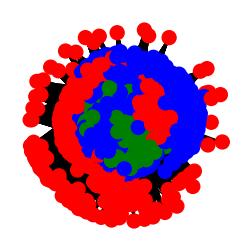

In [ ]:
fig, ax = plt.subplots(figsize = (3,3))

color_nodo1000 = [colores[i-1] for i in df_grafo['nivel']]
nx.draw(G_corto, node_color=color_nodo1000, node_size=100,width=1)

In [ ]:
# Diccionario: {ID_nodo : color}
color_nodo = {
    row.ID_nuevo: colores[row.nivel - 1]
    for _, row in df_grafo.iterrows()}

In [ ]:
faltan = [n for n in G_corto.nodes if n not in color_nodo]
faltan

[]

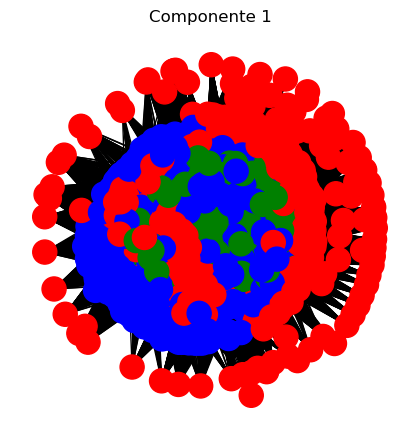

In [ ]:
componentes = nx.connected_components(G_corto)

for i, comp in enumerate(componentes):
    subG = G_corto.subgraph(comp)

    # lista de colores SOLO para los nodos del subgrafo
    colores_sub = [color_nodo[n] for n in subG.nodes()]
    plt.figure(figsize=(4, 4))
    nx.draw(
        subG,
        with_labels=False,
        node_size=300,
        node_color=colores_sub)
    plt.title(f"Componente {i+1}")
    plt.show()

In [ ]:
nodos_grado_1 = [n for n, d in G_corto.degree() if d < 300]
len(nodos_grado_1)

96

In [ ]:
triangulos_dict = nx.triangles(G_corto)
triangulos_dict

{1: 197044,
 2: 136909,
 3: 105311,
 4: 287376,
 5: 64648,
 6: 287376,
 7: 89199,
 8: 89515,
 9: 242348,
 10: 122771,
 11: 242348,
 12: 242348,
 13: 65788,
 14: 287376,
 15: 3301,
 16: 18351,
 17: 146172,
 18: 69417,
 19: 4860,
 20: 18351,
 21: 3301,
 22: 69417,
 23: 69417,
 24: 242348,
 25: 69417,
 26: 451082,
 27: 103703,
 28: 242348,
 29: 7424,
 30: 242348,
 31: 53217,
 32: 100420,
 33: 65788,
 34: 242348,
 35: 139992,
 36: 287376,
 37: 95667,
 38: 89045,
 39: 287376,
 40: 7424,
 41: 77584,
 42: 210177,
 43: 248333,
 44: 110382,
 45: 144825,
 46: 157841,
 47: 72561,
 48: 127060,
 49: 287376,
 50: 88154,
 51: 9681,
 52: 64648,
 53: 242348,
 54: 451082,
 55: 89199,
 56: 287376,
 57: 18351,
 58: 7424,
 59: 77584,
 60: 242348,
 61: 146572,
 62: 194311,
 63: 602725,
 64: 146172,
 65: 242348,
 66: 122524,
 67: 242348,
 68: 160310,
 69: 110382,
 70: 144825,
 71: 146791,
 72: 451082,
 73: 144825,
 74: 215317,
 75: 4860,
 76: 602725,
 77: 185716,
 78: 363044,
 79: 134367,
 80: 258994,
 81: 1

In [ ]:
df_grafo['num_triangulos'] = df_grafo['ID_nuevo'].map(triangulos_dict).fillna(0).astype(int)

In [ ]:
df_grafo

ID_color  nivel        Color  \
0            6549c1b1-989e-432a-bdc9-b603c438b310yellow      2       yellow   
23             6549c1b1-989e-432a-bdc9-b603c438b310ecru      2         ecru   
69        6549c1b1-989e-432a-bdc9-b603c438b310blue_dark      2    blue_dark   
345           350b09b1-9156-468f-a7e8-b99cec0d6f6eblack      1        black   
429       350b09b1-9156-468f-a7e8-b99cec0d6f6eblue_dark      1    blue_dark   
...                                                 ...    ...          ...   
198235  50701dda-a3f4-4b59-8698-da3757382574green_light      2  green_light   
198304       50701dda-a3f4-4b59-8698-da3757382574yellow      2       yellow   
198350         50701dda-a3f4-4b59-8698-da3757382574pink      2         pink   
198465          22efc184-5ecb-401d-8dea-9569ceae492dred      1          red   
198488       22efc184-5ecb-401d-8dea-9569ceae492dpurple      1       purple   

        color_nivel  Temporada     Marca  \
0                54          9  BRAND119   
23               51          9  BRAND119   
69              100          9  BRAND119   
345               0          9   BRAND15   
429             100          9   BRAND15   
...             ...        ...       ...   
198235           75          9   BRAND15   
198304           54          9   BRAND15   
198350           15          9   BRAND15   
198465           12          9   BRAND15   
198488          112          9   BRAND15   

                                          ID tipo_prenda2  long_cm1  \
0       6549c1b1-989e-432a-bdc9-b603c438b310       jersey      58.0   
23      6549c1b1-989e-432a-bdc9-b603c438b310       jersey      58.0   
69      6549c1b1-989e-432a-bdc9-b603c438b310       jersey      58.0   
345     350b09b1-9156-468f-a7e8-b99cec0d6f6e   pantalones      94.0   
429     350b09b1-9156-468f-a7e8-b99cec0d6f6e   pantalones      94.0   
...                                      ...          ...       ...   
198235  50701dda-a3f4-4b59-8698-da3757382574     camiseta      65.0   
198304  50701dda-a3f4-4b59-8698-da3757382574     camiseta      65.0   
198350  50701dda-a3f4-4b59-8698-da3757382574     camiseta      65.0   
198465  22efc184-5ecb-401d-8dea-9569ceae492d   pantalones      38.0   
198488  22efc184-5ecb-401d-8dea-9569ceae492d   pantalones      38.0   

        sleeve_long_cm1  ID_nuevo  num_triangulos  
0                  58.0         1          197044  
23                 58.0         2          136909  
69                 58.0         3          105311  
345                 NaN         4          287376  
429                 NaN         5           64648  
...                 ...       ...             ...  
198235              NaN      1728           74276  
198304              NaN      1729          100682  
198350              NaN      1730          101750  
198465              NaN      1731          139992  
198488              NaN      1732          154536  

[1732 rows x 12 columns]

In [ ]:
triangulos = [c for c in nx.cycle_basis(G_corto) if len(c) == 3]
len(triangulos)

326123

In [ ]:
triangulos_validos = []

for tri in triangulos:
    niveles = [prendas_c[n]['nivel'] for n in tri]
    # condición: exactamente un nivel 1
    if niveles.count(1) == 1 and all(n in [1,2,3] for n in niveles):
        # condición adicional: los otros dos deben ser 2 o 3
        niveles_sin_1 = [n for n in niveles if n != 1]
        if all(n in [2, 3] for n in niveles_sin_1):
            triangulos_validos.append(tri)

In [ ]:
len(triangulos_validos)

308671

In [ ]:
df_grafo[df_grafo['ID_nuevo'].isin([175, 187, 789,877])]

ID_color  nivel       Color  \
20171  64334c2b-503b-463a-a82d-aca96e9e231dgray_light      3  gray_light   
20593  eb2afe5a-3645-4899-b5ea-144ac2a1904cgray_light      3  gray_light   
88492   8da9d2d5-7531-4849-8623-d177b7c12261grey_dark      3   grey_dark   
97937   8dcf18c2-d259-4819-afb8-d17aa05aad55grey_dark      3   grey_dark   

       color_nivel  Temporada     Marca                                    ID  \
20171            2          9  BRAND143  64334c2b-503b-463a-a82d-aca96e9e231d   
20593            2          9  BRAND167  eb2afe5a-3645-4899-b5ea-144ac2a1904c   
88492            2          9  BRAND167  8da9d2d5-7531-4849-8623-d177b7c12261   
97937            2          9  BRAND157  8dcf18c2-d259-4819-afb8-d17aa05aad55   

      tipo_prenda2  long_cm1  sleeve_long_cm1  ID_nuevo  num_triangulos  
20171      bufanda       NaN              NaN       175          610098  
20593      bufanda       NaN              NaN       187          610098  
88492      bufanda       NaN              NaN       789          610098  
97937      bufanda       NaN              NaN       877          610098

In [ ]:
triangulos_validos[10000:10020]

[[1341, 1179, 1720],
 [1348, 1179, 1720],
 [1361, 1179, 1720],
 [1362, 1179, 1720],
 [1371, 1179, 1720],
 [1372, 1179, 1720],
 [1373, 1179, 1720],
 [1394, 1179, 1720],
 [1412, 1179, 1720],
 [1441, 1179, 1720],
 [1447, 1179, 1720],
 [1468, 1179, 1720],
 [1470, 1179, 1720],
 [1496, 1179, 1720],
 [1520, 1179, 1720],
 [1546, 1179, 1720],
 [1573, 1179, 1720],
 [1574, 1179, 1720],
 [1583, 1179, 1720],
 [1585, 1179, 1720]]

In [ ]:
G_corto.edges()

EdgeView([(1, 4), (1, 6), (1, 7), (1, 9), (1, 10), (1, 11), (1, 12), (1, 14), (1, 17), (1, 18), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 30), (1, 32), (1, 34), (1, 35), (1, 36), (1, 39), (1, 42), (1, 43), (1, 45), (1, 46), (1, 48), (1, 49), (1, 53), (1, 54), (1, 55), (1, 56), (1, 60), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 70), (1, 72), (1, 73), (1, 74), (1, 76), (1, 78), (1, 83), (1, 84), (1, 85), (1, 87), (1, 88), (1, 89), (1, 92), (1, 93), (1, 94), (1, 95), (1, 97), (1, 100), (1, 103), (1, 107), (1, 110), (1, 111), (1, 114), (1, 115), (1, 118), (1, 119), (1, 120), (1, 121), (1, 122), (1, 123), (1, 124), (1, 128), (1, 130), (1, 132), (1, 136), (1, 137), (1, 138), (1, 139), (1, 140), (1, 141), (1, 142), (1, 143), (1, 145), (1, 147), (1, 148), (1, 151), (1, 152), (1, 153), (1, 155), (1, 156), (1, 157), (1, 158), (1, 161), (1, 162), (1, 164), (1, 168), (1, 170), (1, 172), (1, 174), (1, 175), (1, 179), (1, 180), (1, 181), (1, 183), (1

In [ ]:
G = nx.Graph()
G.add_nodes_from(prendas)

In [ ]:
estampados = df[df['Caracteristica1']== 'print']['Caracteristica'].unique()

In [ ]:
for i, est in enumerate(estampados):
    print(i, ': ', est)

0 :  smooth
1 :  animal_print
2 :  sheets
3 :  bodoque
4 :  miniprint
5 :  retro
6 :  herringbone
7 :  horizontal_stripes
8 :  vertical_stripes
9 :  printed
10 :  floral
11 :  ethnic
12 :  checked
13 :  geometric
14 :  liberty
15 :  polka_dot
16 :  other
17 :  tie_dye
18 :  two_tone
19 :  camouflage
20 :  cachemere
21 :  tropical
22 :  tapestry
23 :  prince_of_wales
24 :  diagonal_stripe
